In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator



sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Load the data
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")              

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

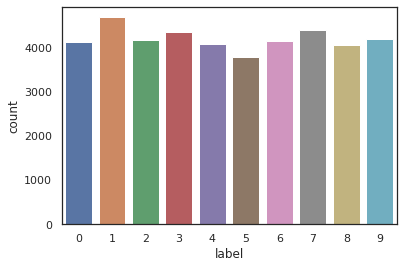

In [3]:
Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

In [4]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
# Set the random seed
random_seed = 2

In [10]:
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

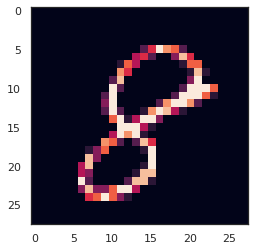

In [11]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [12]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=25, verbose=1, validation_data=(X_val, Y_val),batch_size=32)

Epoch 1/25
1182/1182 [==============================] - 139s 117ms/step - loss: 0.2052 - accuracy: 0.9355 - val_loss: 0.0706 - val_accuracy: 0.9788
Epoch 2/25
1182/1182 [==============================] - 136s 115ms/step - loss: 0.0741 - accuracy: 0.9775 - val_loss: 0.0455 - val_accuracy: 0.9855
Epoch 3/25
1182/1182 [==============================] - 136s 115ms/step - loss: 0.0574 - accuracy: 0.9833 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch 4/25
1182/1182 [==============================] - 136s 115ms/step - loss: 0.0475 - accuracy: 0.9856 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 5/25
1182/1182 [==============================] - 136s 115ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0299 - val_accuracy: 0.9917
Epoch 6/25
1182/1182 [==============================] - 136s 115ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.0511 - val_accuracy: 0.9895
Epoch 7/25
1182/1182 [==============================] - 137s 116ms/step - loss: 0.0350 - accuracy: 0.9899 - val_